## Importing the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)

## Loading the Data

In [2]:
# importing dataset
df = pd.read_csv('DS3_C6_S2_Classification_BankChurn_Data_Project.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Overview

In [3]:
# finding out the no of columns and rows 
df.shape

(10000, 13)

In [4]:
# description of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
# checking null values, if any
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Performing EDA

##### with the help of different plots and illustrations trying to eloborate the data

In [6]:
# droping columns which seems not to directly effect the prediction
df_a = df.drop(['Geography', 'Gender', 'Surname', 'CreditScore', 'EstimatedSalary'], axis = 1)
df_a.shape

(10000, 8)

In [7]:
df_a.head()

,CustomerId,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,42,2,0.00,1,1,1,1
1,15647311,41,1,83807.86,1,0,1,0
2,15619304,42,8,159660.80,3,1,0,1
3,15701354,39,1,0.00,2,0,0,0
4,15737888,43,2,125510.82,1,1,1,0


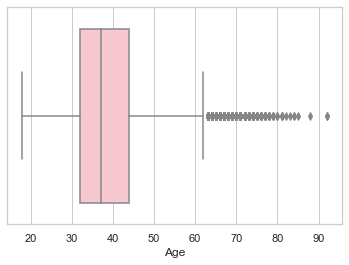

In [8]:
# finding outliers in age
sns.boxplot(x = df_a["Age"], color = "pink");

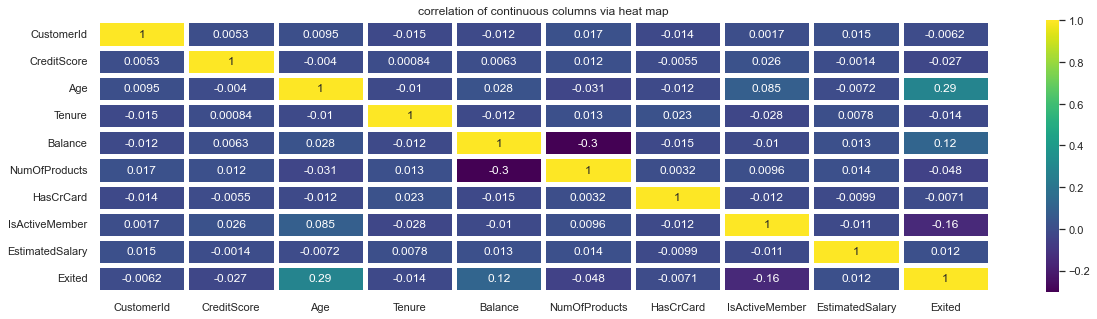

In [9]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.heatmap(df.corr(), cmap = 'viridis', annot = True, linewidth = 5).set_title('correlation of continuous columns via heat map')
plt.show()

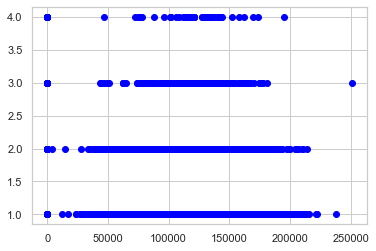

In [10]:
plt.scatter(df_a.Balance, df_a.NumOfProducts, color = 'blue');

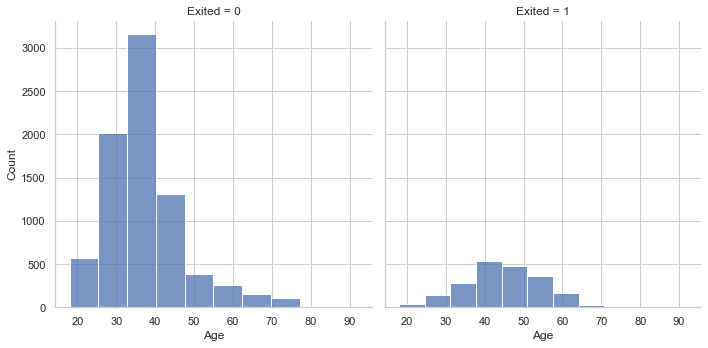

In [11]:
data_1 = df_a[(df_a['Exited'] == 0) | (df_a["Exited"] == 1)]
g = sns.FacetGrid(data_1, col = "Exited", height = 5)
g.map(sns.histplot, "Age", bins = 10);

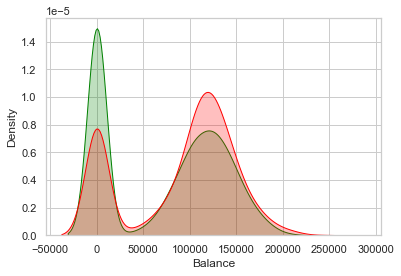

In [12]:
sns.kdeplot(df_a[df_a['Exited'] == 0]['Balance'], shade = True, color = 'green')
sns.kdeplot(df_a[df_a['Exited'] == 1]['Balance'], shade = True, color = 'red')
plt.show()

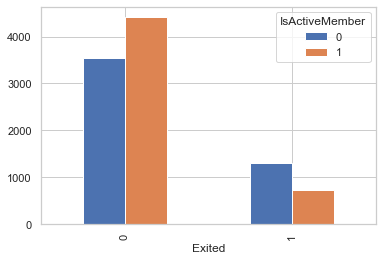

In [13]:
pd.crosstab(df_a.Exited, df_a.IsActiveMember).plot(kind='bar')
plt.show()

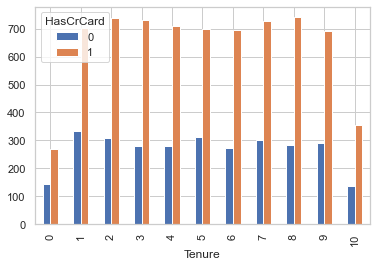

In [14]:
pd.crosstab(df_a.Tenure, df_a.HasCrCard).plot(kind='bar')
plt.show()

## Preparing the Data

In [15]:
df_scale = df_a

from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()

scale_columns = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
df_scale[scale_columns] = minmax.fit_transform(df_a[scale_columns])
df_scale.head()

,CustomerId,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,0.324324,0.2,0.000000,0.000000,1.0,1.0,1.0
1,15647311,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.0
2,15619304,0.324324,0.8,0.636357,0.666667,1.0,0.0,1.0
3,15701354,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.0
4,15737888,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.0


In [16]:
X = df_scale.drop(columns = 'Exited', axis =1)
y = df.Exited

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

## Modelling

### Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(max_depth = 3)

clf = clf.fit(X_train,y_train)

y_pred1 = clf.predict(X_test)

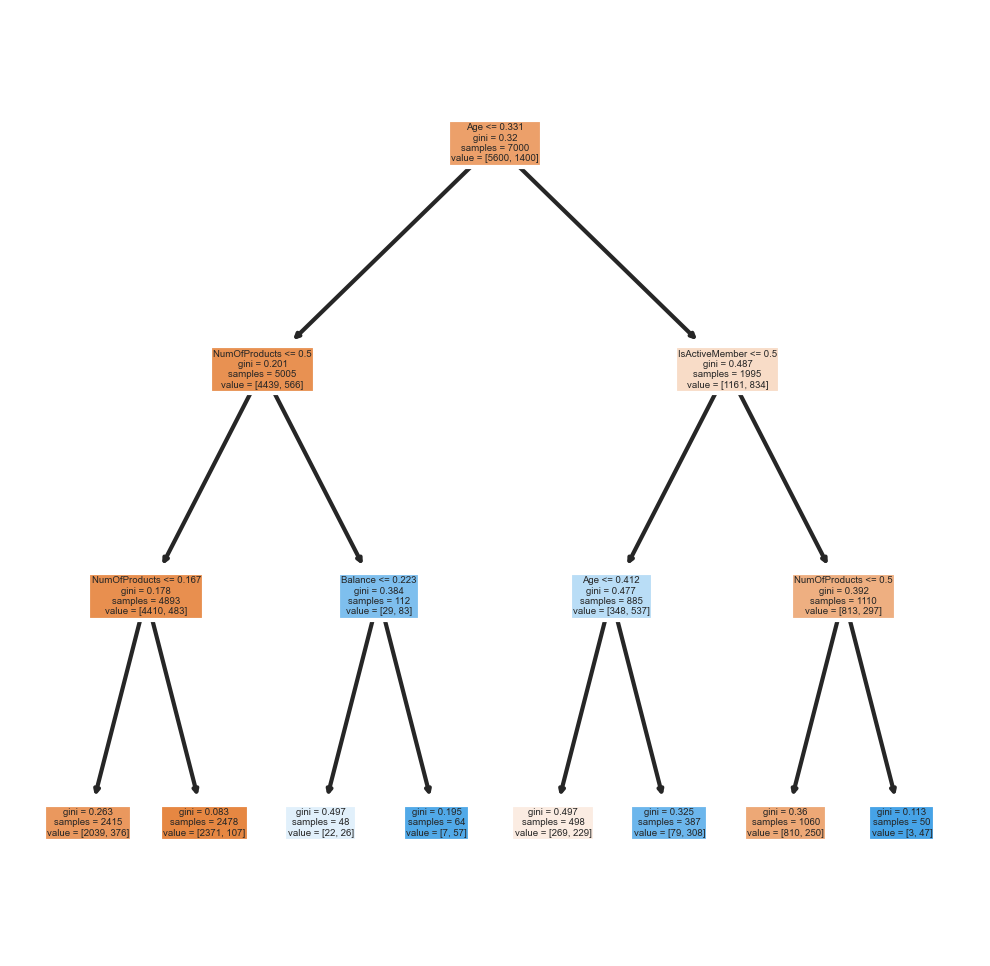

In [18]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
           feature_names = df_scale.columns, 
           filled = True);

fig.savefig('Decision_Tree.png')

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(y_test, y_pred1))

accuracy: 0.8343333333333334


### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred2 = logreg.predict(X_test)

print('accuracy:', accuracy_score(y_test, y_pred2))

accuracy: 0.7876666666666666


### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier


ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)
y_pred3 = ranfor.predict(X_test)
y_pred3

print('accuracy:', accuracy_score(y_test, y_pred3))

accuracy: 0.842


## Conclusion

As per model evaluation, Random Forest Classifier model is giving the best accuracy score. Therefore we can use this algorithm to predict the churn of customers.